<a href="https://colab.research.google.com/github/amathsow/deep-learning/blob/master/Amath_SOW_Auto_Encoder_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import FashionMNIST
from matplotlib import pyplot as plt

In [0]:
# Convert vector to image
def to_img(x):
    x = 0.5 * (x + 1)
    x = x.view(x.size(0), 28, 28)
    return x

In [0]:
bs = 1000

transform = transforms.Compose([transforms.ToTensor()])

traindataset = FashionMNIST('./data', download=True, train=True, transform=transform)
testdataset = FashionMNIST('./data', download=True, train=False, transform=transform)

# Loaders
trainloader = torch.utils.data.DataLoader(traindataset, batch_size=bs, shuffle=True, num_workers=4)
testloader = torch.utils.data.DataLoader(testdataset, batch_size=bs, shuffle=False, num_workers=4)

In [0]:
# Displaying routine
def display_images(in_, out, n=1):
    for N in range(n):
        if in_ is not None:
            in_pic = to_img(in_.cpu().data)
            plt.figure(figsize=(18, 6))
            for i in range(4):
                plt.subplot(1,4,i+1)
                plt.imshow(in_pic[i+4*N])
                plt.axis('off')
        out_pic = to_img(out.cpu().data)
        plt.figure(figsize=(18, 6))
        for i in range(4):
            plt.subplot(1,4,i+1)
            plt.imshow(out_pic[i+4*N])
            plt.axis('off')

In [0]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
        nn.Linear(28*28, 100),
        nn.ReLU())
        
        self.decoder = nn.Sequential(
        nn.Linear(100, 28*28),
        nn.ReLU())
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [0]:
model_ae = AutoEncoder()

In [0]:
# Configure the optimiszer and criterion
learning_rate = 1e-3

optimizer = torch.optim.Adam(model_ae.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

epoch [1/10], loss:0.0409
epoch [2/10], loss:0.0296
epoch [3/10], loss:0.0243
epoch [4/10], loss:0.0222
epoch [5/10], loss:0.0200
epoch [6/10], loss:0.0197
epoch [7/10], loss:0.0189
epoch [8/10], loss:0.0174
epoch [9/10], loss:0.0170
epoch [10/10], loss:0.0166


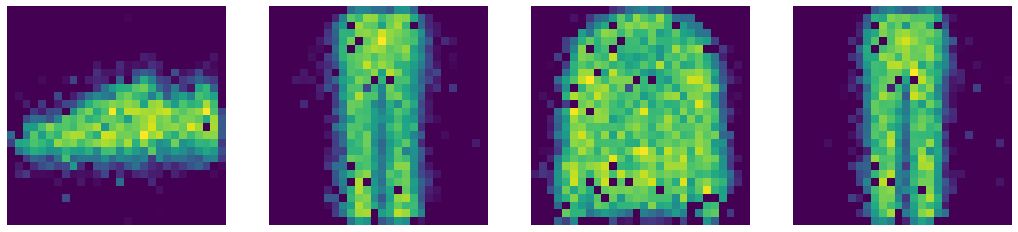

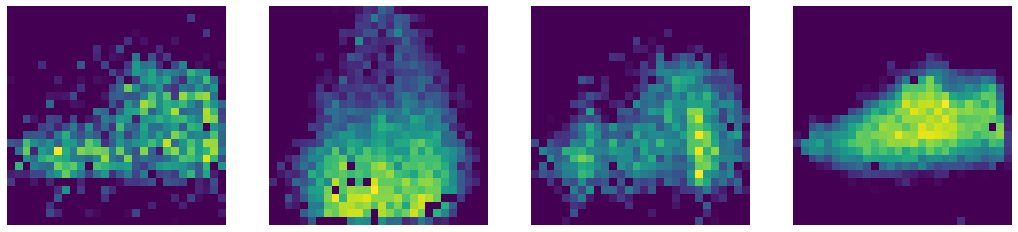

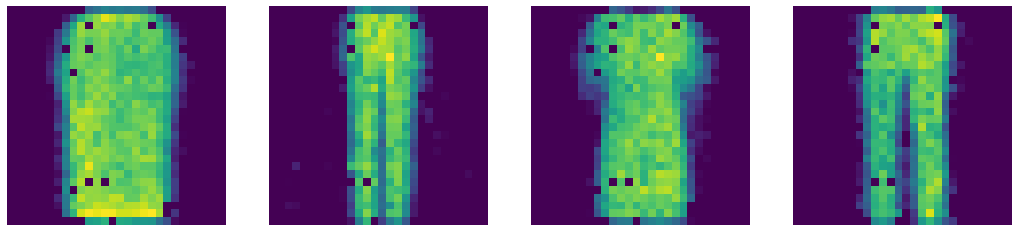

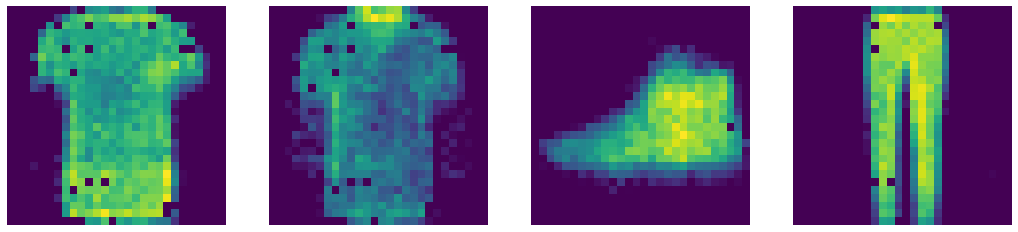

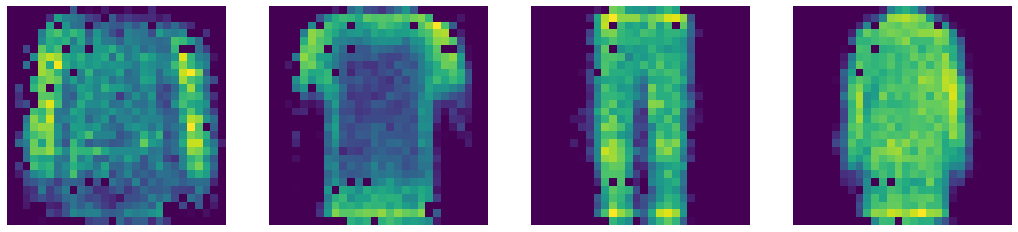

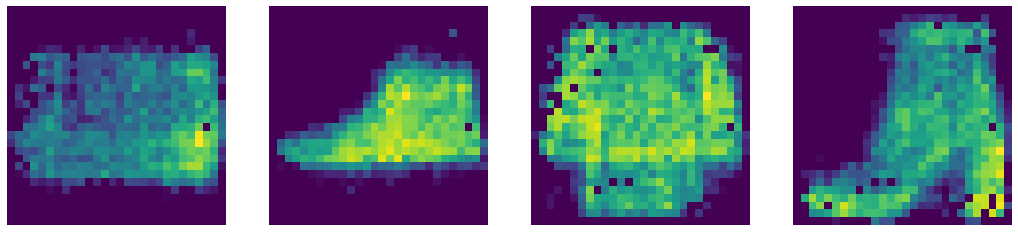

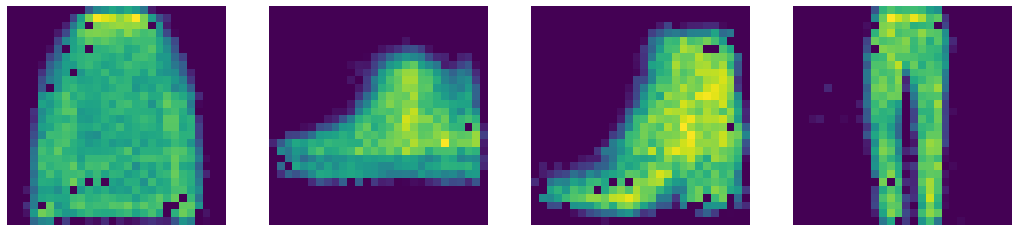

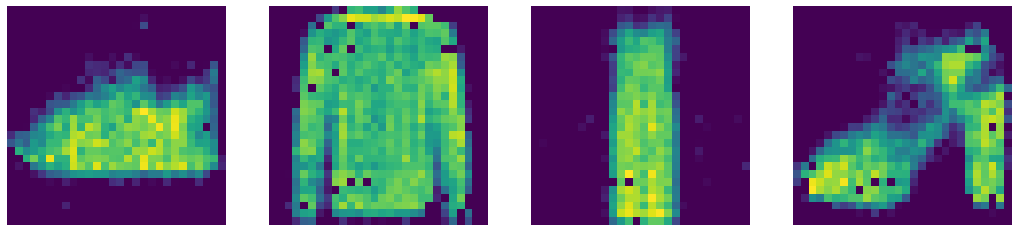

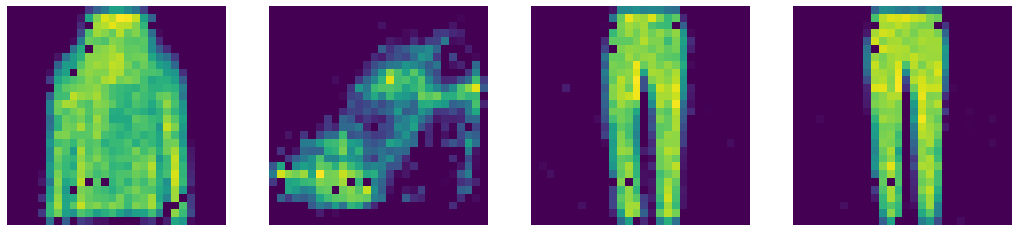

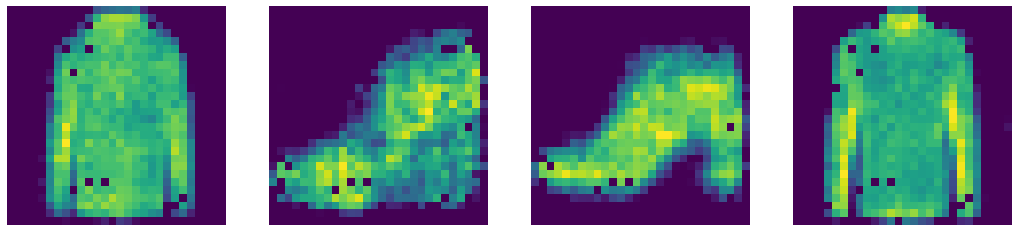

In [8]:
num_epochs = 10
value_loss=[]
for epoch in range(num_epochs):
    for data in trainloader:
        img, _ = data
        img.requires_grad_()
        img = img.view(img.size(0), -1)
        output = model_ae(img)  
        loss = criterion(output, img.data)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        value_loss.append(loss.item())
    # ===================log========================
    print(f'epoch [{epoch + 1}/{num_epochs}], loss:{loss.item():.4f}')
    display_images(None, output)

In [0]:
from torch.autograd import Variable
plt.style.use('default')
%matplotlib inline 

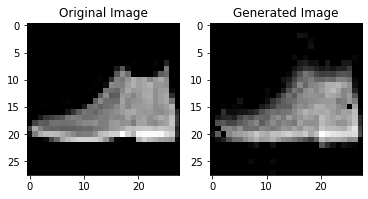

In [10]:
test_images, labels = next(iter(testloader))

test_images = Variable(test_images.view(test_images.size()[0], -1))
test_output = model_ae(test_images)
  
inp = test_images.view(-1, 28, 28)
out = test_output.view(-1, 28, 28)

fig = plt.figure()
plot = fig.add_subplot(1, 2, 1)
plot.set_title('Original Image')
imgplot = plt.imshow(inp[0].cpu(), cmap='gray')

plot = fig.add_subplot(1, 2, 2)
plot.set_title('Generated Image')
imgplot = plt.imshow(out[0].cpu().detach(), cmap='gray')
plt.show()

# Exercises

Your exercise should you choose to accept, is to 

1. change the model class to use Convolution Layers and re-run with the same training code in cells below.
2. Edit the code above for denoising autoencoder? (bonus point if your code it)
3. Briefly describe the performance of using the fully connected auto-encoder to the CNN_Autoencoder

Deadline: Today: 2:pm

In [0]:
class AutoEncoderCNN(nn.Module):
    def __init__(self):
        super(AutoEncoderCNN, self).__init__()
        self.encoder = nn.Sequential(
                                     nn.Conv2d(1, 64, 3, stride=3, padding=1),
                                     nn.Tanh(),
                                     nn.MaxPool2d(2, stride=2),
                                     nn.Conv2d(64, 8, 3, stride=2, padding=1),
                                     nn.Tanh(),
                                     nn.MaxPool2d(2, stride=1),
        )
        self.decoder = nn.Sequential(
                                      nn.ConvTranspose2d(8, 64, 3, stride=2), 
                                      nn.Tanh(),
                                      nn.ConvTranspose2d(64, 8, 5, stride=3, padding=1),
                                      nn.Tanh(),
                                      nn.ConvTranspose2d(8, 1, 2, stride=2, padding=1), 
                                      nn.Tanh()
        )
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [0]:
model_ae = AutoEncoderCNN()

In [0]:
# Configure the optimiszer and criterion
learning_rate = 1e-3

optimizer = torch.optim.Adam(model_ae.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

epoch [1/10], loss:0.0580
epoch [2/10], loss:0.0416
epoch [3/10], loss:0.0347
epoch [4/10], loss:0.0329
epoch [5/10], loss:0.0302
epoch [6/10], loss:0.0293
epoch [7/10], loss:0.0278
epoch [8/10], loss:0.0276
epoch [9/10], loss:0.0274
epoch [10/10], loss:0.0272


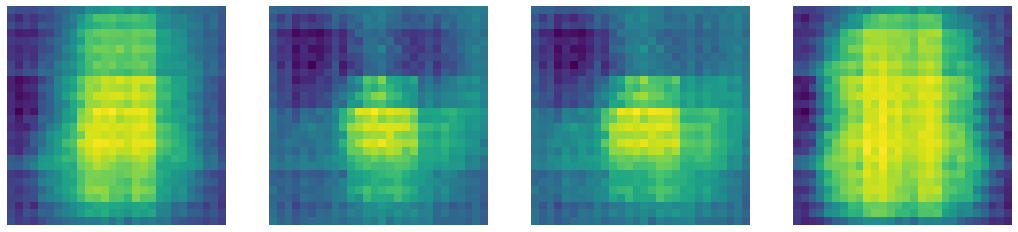

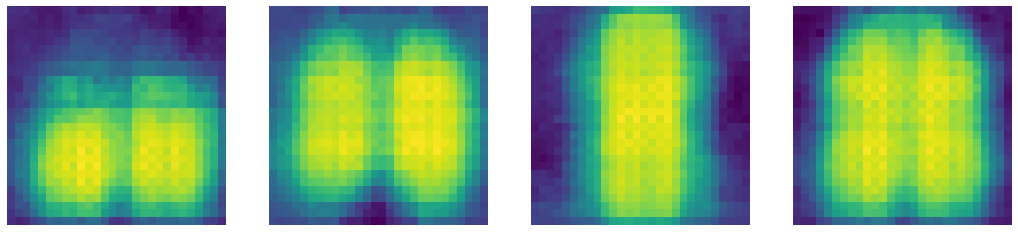

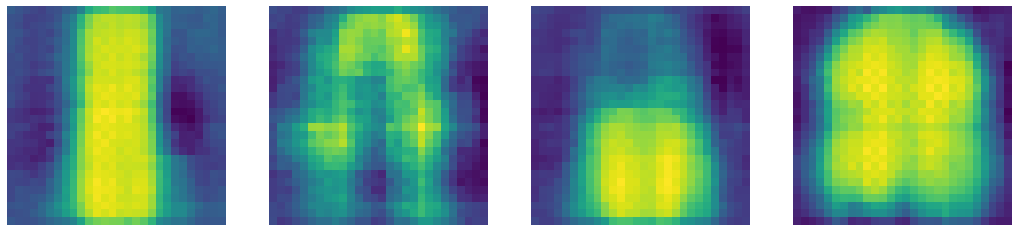

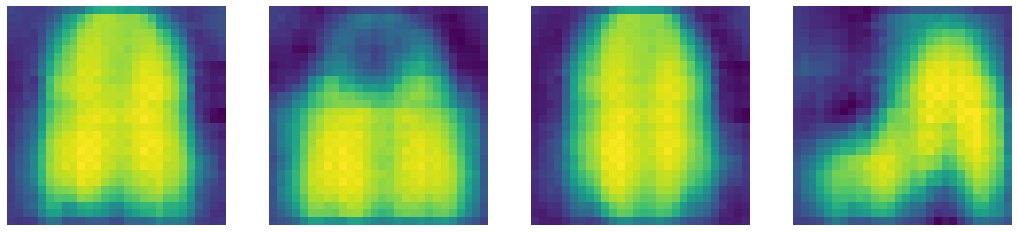

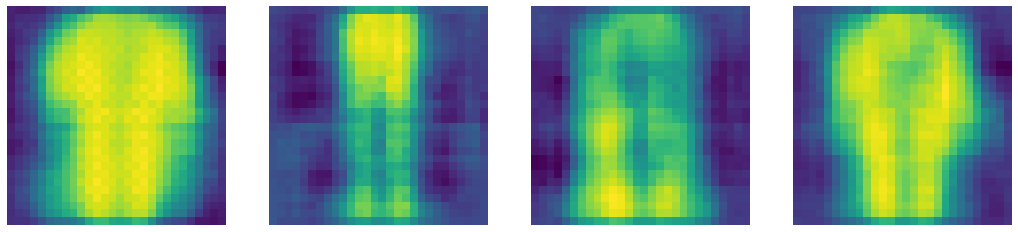

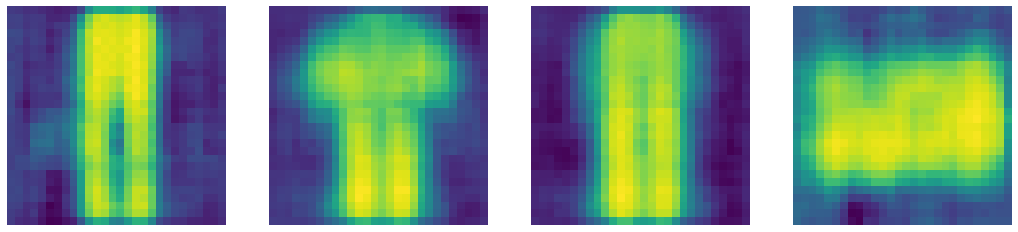

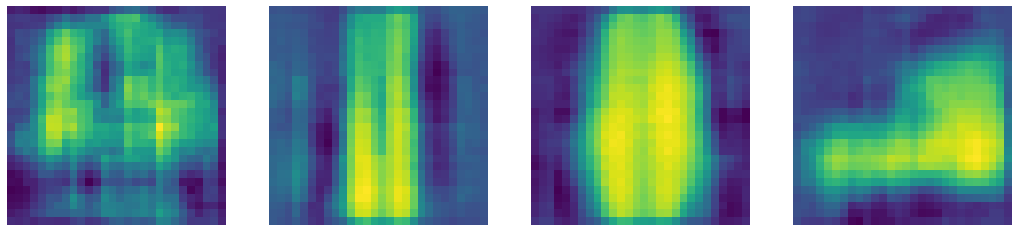

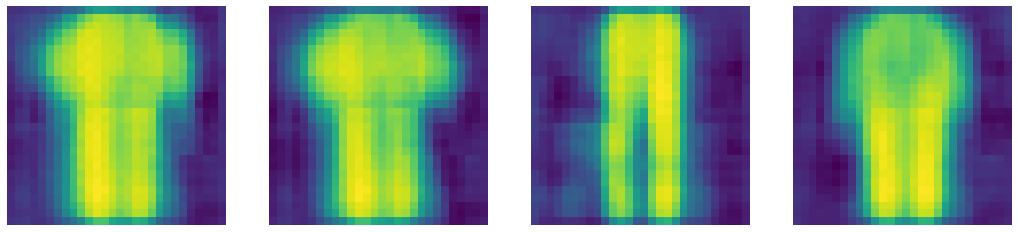

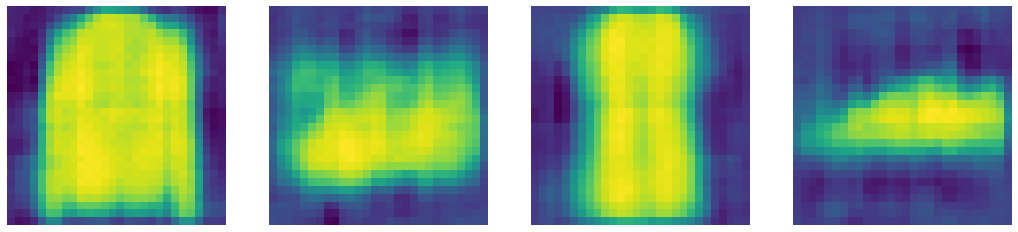

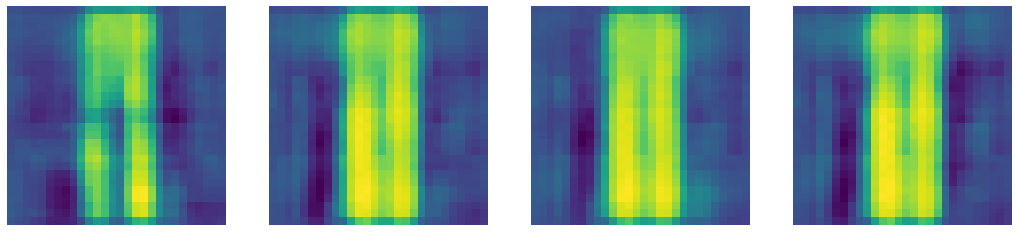

In [14]:
num_epochs = 10
values_loss=[]
for epoch in range(num_epochs):
    for data in trainloader:
        img, _ = data
        img.requires_grad_()
        #img = img.view(img.size(0), -1)
        output = model_ae(img)  
        loss = criterion(output, img.data)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    values_loss.append(loss.item())
    # ===================log========================
    print(f'epoch [{epoch + 1}/{num_epochs}], loss:{loss.item():.4f}')
    display_images(None, output)

In [0]:
from torch.autograd import Variable
plt.style.use('default')
%matplotlib inline 

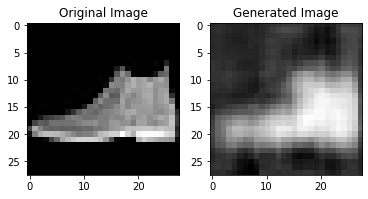

In [16]:
test_images, labels = next(iter(testloader))

test_images = Variable(test_images)
test_output = model_ae(test_images)
  
inp = test_images.view(-1, 28, 28)
out = test_output.view(-1, 28, 28)

fig = plt.figure()
plot = fig.add_subplot(1, 2, 1)
plot.set_title('Original Image')
imgplot = plt.imshow(inp[0].cpu(), cmap='gray')

plot = fig.add_subplot(1, 2, 2)
plot.set_title('Generated Image')
imgplot = plt.imshow(out[0].cpu().detach(), cmap='gray')
plt.show()

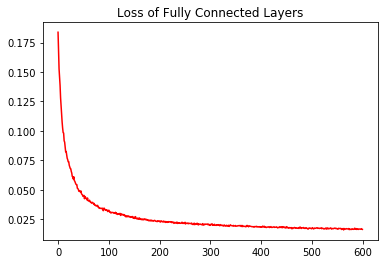

In [17]:
plt.plot(value_loss,'r')
plt.title("Loss of Fully Connected Layers")
plt.show()

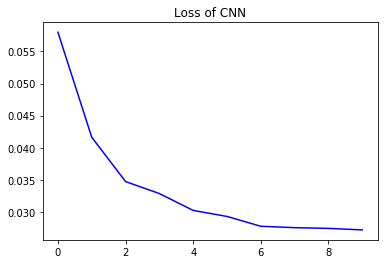

In [18]:
plt.plot(values_loss,'b')
plt.title("Loss of CNN")
plt.show()

The Fully connected layer loss decrease faster the CNN loss. So it's due to we add 2 convolutionals neurals layers and it's not enough. So if i increase the numbers of convolutionals layers, the loss will be decreasing faster than fully connected layer.

In [0]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dtype = torch.double

In [0]:
import torch.nn.functional as F
class VAE(nn.Module):
    def __init__(self):
        self.beta=1
        super().__init__()
        self.fc1 = nn.Linear(784, 400)
        self.fc21 = nn.Linear(400, 20)
        self.fc22 = nn.Linear(400, 20)
        self.fc3 = nn.Linear(20, 400)
        self.fc4 = nn.Linear(400, 784)

    def encode(self, x):
        h1 = F.relu(self.fc1(x))
        return self.fc21(h1), self.fc22(h1)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        h3 = F.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 784))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar
    
    def loss(self, recon_x, x, mu, logvar):
        # reconstruction losses are summed over all elements and batch
        recon_loss = F.binary_cross_entropy_with_logits(recon_x, x, reduction='sum')
        # 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
        kl_diverge = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
        return (recon_loss + self.beta * kl_diverge) / x.shape[0] 

In [0]:
model = VAE()
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

epoch [1/10], loss:544.8992
epoch [2/10], loss:540.4586
epoch [3/10], loss:538.5046
epoch [4/10], loss:534.9481
epoch [5/10], loss:531.5719
epoch [6/10], loss:532.0305
epoch [7/10], loss:530.7626
epoch [8/10], loss:528.7710
epoch [9/10], loss:528.9778
epoch [10/10], loss:527.9771


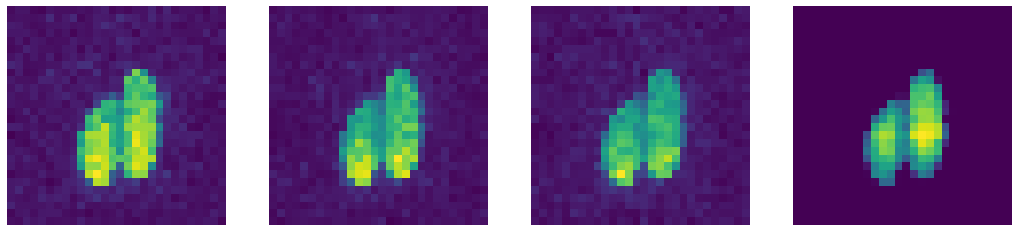

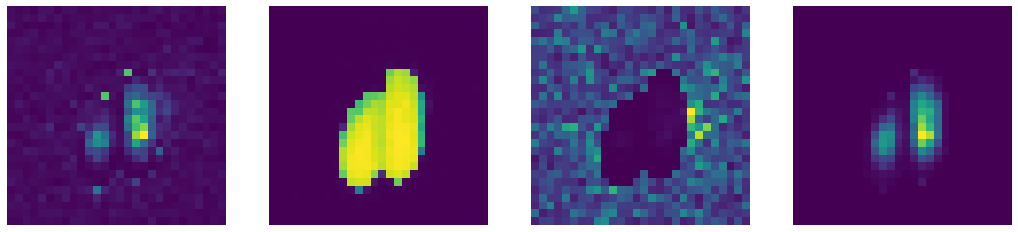

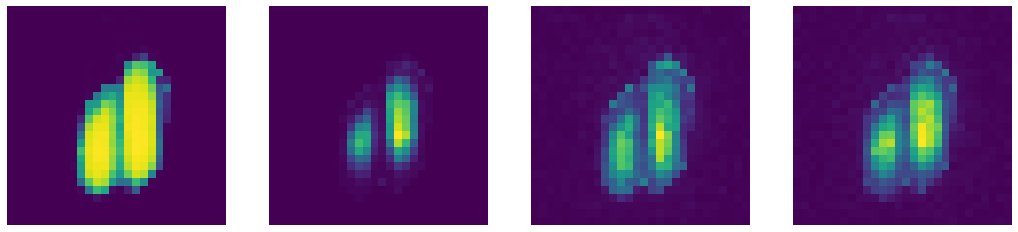

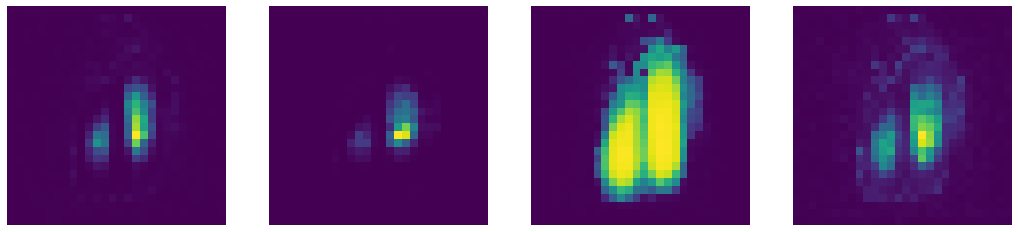

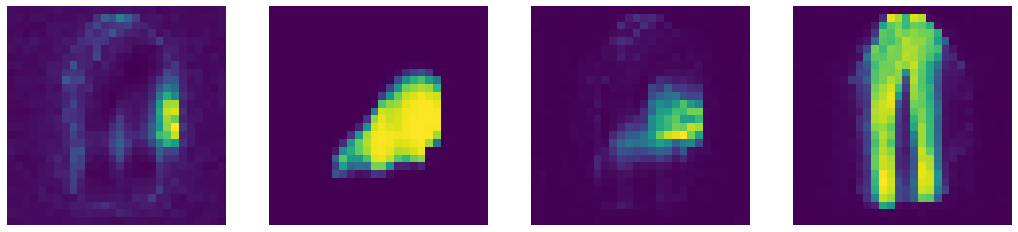

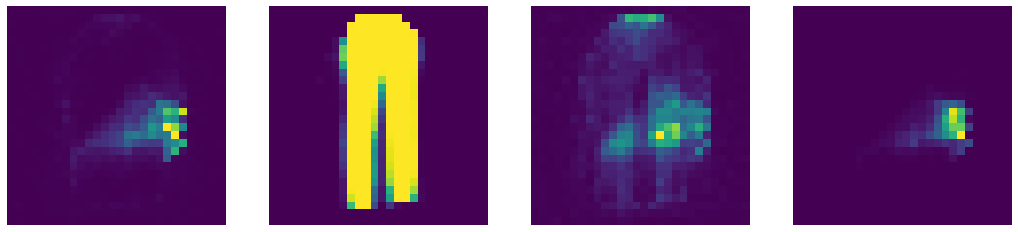

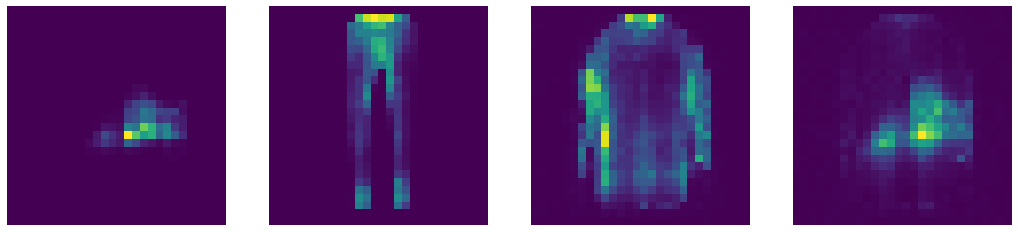

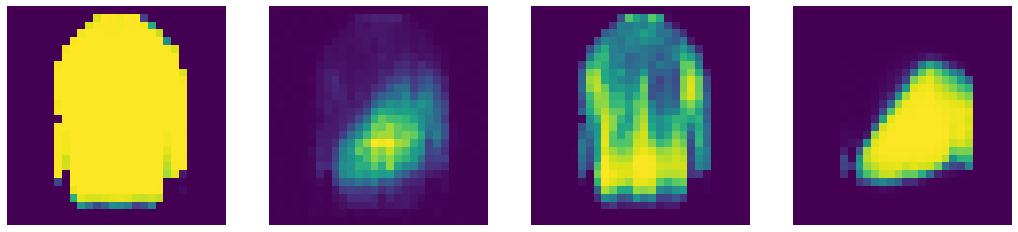

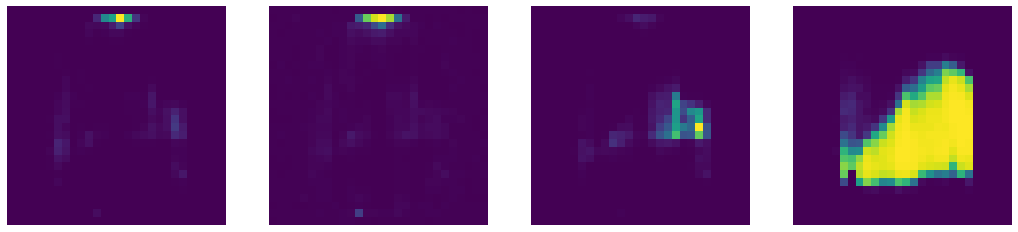

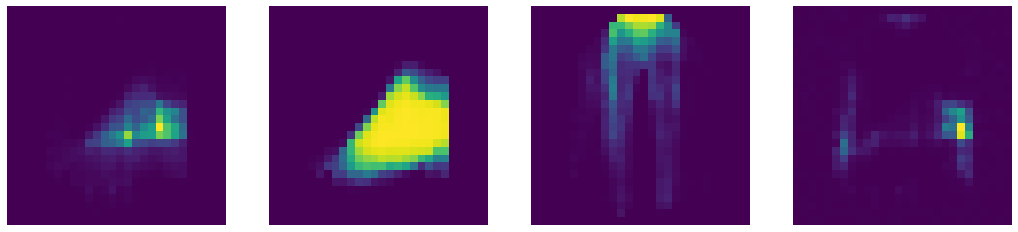

In [52]:
num_epochs = 10
vae_loss=[]
for epoch in range(num_epochs):
    for data in trainloader:
        img, _ = data
        img.requires_grad_()
        img = img.view(img.size(0), -1)
        img_hat,mu,logvar= model(img)  
        #print(img_hat)
        loss = model.loss(img_hat,img,mu,logvar)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    vae_loss.append(loss.item())
    # ===================log========================
    print(f'epoch [{epoch + 1}/{num_epochs}], loss:{loss.item():.4f}')
    display_images(None, img_hat)

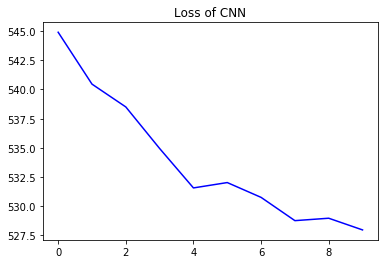

In [53]:
plt.plot(vae_loss,'b')
plt.title("Loss of CNN")
plt.show()